In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv('iris-dataset.csv')
datalw=data.drop(['petal_length','petal_width'],axis=1)
datalw

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


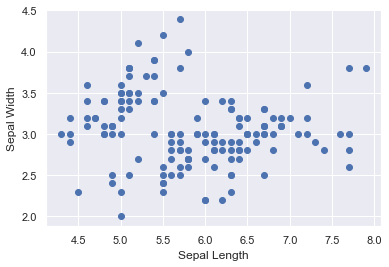

In [3]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [4]:
kmeans=KMeans(2)

In [6]:
kmeans.fit(datalw)
cluster=data.copy()
cluster['clusterpred']=kmeans.fit_predict(datalw)

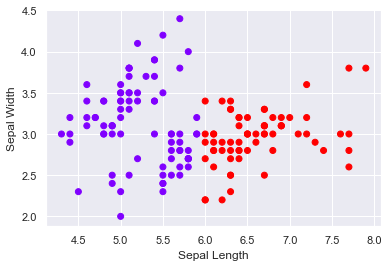

In [7]:
plt.scatter(cluster['sepal_length'],cluster['sepal_width'],c=cluster['clusterpred'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [8]:
from sklearn.preprocessing import scale
datascaled=scale(datalw)

In [9]:
kmscaled=KMeans(5)
kmscaled.fit(datascaled)
clusterscaled=datalw.copy()
clusterscaled['cluster']=kmscaled.fit_predict(datascaled)

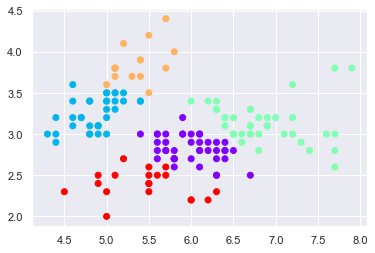

In [10]:
plt.scatter(clusterscaled['sepal_length'],clusterscaled['sepal_width'],c=clusterscaled['cluster'],cmap='rainbow')
plt.xlabel='Sepal Length'
plt.ylabel='Sepal Width'
plt.show()

In [11]:
wcss = []

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(datascaled)
    wcss.append(kmeans.inertia_)
wcss

[300.00000000000006,
 168.39262198361095,
 103.78982520596088,
 80.1464127836006,
 61.70659834761936,
 52.06378273084984,
 47.508832857070885,
 36.26255277369075,
 30.64602983245214]

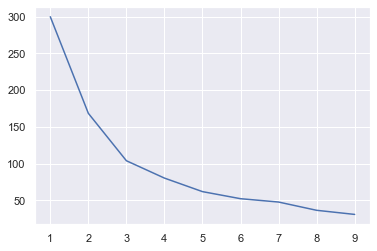

In [12]:
plt.plot(range(1,10),wcss)
plt.xlabel='n of clusters'
plt.ylabel='wcss'

Berdasarkan grafik WCSS, maka cluster terbaik yang bisa digunakan adalah 5